In [7]:
import bh_spc
from bh_spc import spcm
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spcm.init(r'C:\Program Files\Micro-Manager-2.0\sspcm.ini')

In [3]:
spcm.get_init_status(0)

<InitStatus.OK: 0>

In [4]:
params = spcm.get_parameters(0)

In [10]:
#import tqdm.notebook as tqdm

had gap


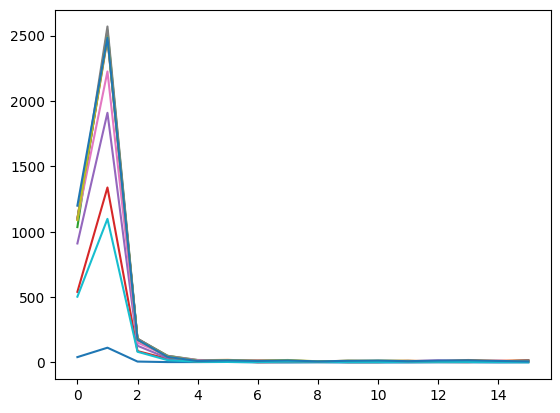

In [8]:
mod_no = 0

params.collect_time =10
spcm.set_parameters(0, params)

duration = spcm.get_parameter(mod_no,spcm.ParID.COLLECT_TIME)  # s
buf_size = 32768  # Max number of 16-bit words in a single read.

spcm.start_measurement(mod_no)
start_time = time.monotonic()

data = []  # Collect arrays of data into a list.
while True:
    elapsed = time.monotonic() - start_time
    if elapsed >= duration:
        spcm.stop_measurement(mod_no)
        break
    buf = spcm.read_fifo_to_array(mod_no, buf_size)
    if len(buf):
        data.append(buf)
    if len(buf) < buf_size:  # We've read all there is to read.
        time.sleep(0.001)

# Make sure to read the data that arrived after stopping (if you need it).
while True:
    buf = spcm.read_fifo_to_array(mod_no, buf_size)
    if not len(buf):
        break
    data.append(buf)
max_12bit = 4095
for ix,data_r in enumerate(data):
    records_r = np.array(data_r).view(np.uint32)
    had_gap = np.any(np.bitwise_and(records_r, 1 << 29))
    if had_gap:
        print("had gap")
    photons_r = np.extract(np.bitwise_and(records_r, 0b1001 << 28) == 0, records_r)
    
    microtimes = np.bitwise_and(np.right_shift(photons_r, 16), max_12bit)
    microtimes = max_12bit - microtimes
    n,h = np.histogram(microtimes, bins=16);
    plt.plot(n)
    #break
    if ix==10:
        break
    

0 had gap


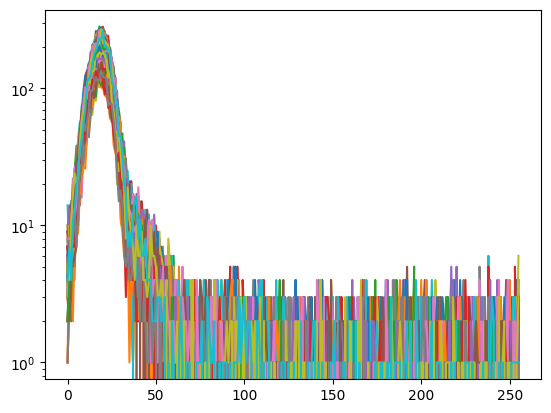

In [15]:
for ix,data_r in enumerate(data):
    records_r = np.array(data_r).view(np.uint32)
    had_gap = np.any(np.bitwise_and(records_r, 1 << 29))
    if had_gap:
        print(f"{ix} had gap")
    else:
        photons_r = np.extract(np.bitwise_and(records_r, 0b1001 << 28) == 0, records_r)
    
        microtimes = np.bitwise_and(np.right_shift(photons_r, 16), max_12bit)
        microtimes = max_12bit - microtimes
        n,h = np.histogram(microtimes, bins=256);
        plt.plot(n)
        plt.yscale('log')
        #break
        if ix==100:
            break

In [5]:
for par, val in params.items(): print(f"{par:<15} = {val}")

cfd_limit_low   = -15.686274528503418
cfd_limit_high  = 5.019608020782471
cfd_zc_level    = 0.0
cfd_holdoff     = 5.0
sync_zc_level   = -5.2913384437561035
sync_freq_div   = 4
sync_holdoff    = 4.0
sync_threshold  = -50.98039245605469
tac_range       = 50.033573150634766
tac_gain        = 4
tac_offset      = 2.3529412746429443
tac_limit_low   = 5.098039150238037
tac_limit_high  = 95.68627166748047
adc_resolution  = 12
ext_latch_delay = 0
collect_time    = 60.0
display_time    = 1.0
repeat_time     = 60.0
stop_on_time    = 0
stop_on_ovfl    = 0
dither_range    = 128
count_incr      = 1
mem_bank        = 0
dead_time_comp  = 0
scan_control    = 0
routing_mode    = 0
tac_enable_hold = 0.0
mode            = 5
scan_size_x     = 1
scan_size_y     = 1
scan_rout_x     = 1
scan_rout_y     = 1
scan_polarity   = 7
scan_flyback    = 65537
scan_borders    = 65542
pixel_time      = 4.999999873689376e-06
pixel_clock     = 0
line_compression = 1
trigger         = 0
ext_pixclk_div  = 4
rate_count_time =

In [35]:
params.collect_time =10
spcm.set_parameters(0, params)

In [7]:
#dir(bh_spc.spcm.Data)

In [8]:
#params.stop_on_time = 0


In [36]:
spcm.get_parameter(mod_no,spcm.ParID.COLLECT_TIME)

10.0

In [45]:
type(spcm.InUseStatus)

enum.EnumMeta

In [47]:
spcm.get_fifo_usage(0)

0.00213623046875

In [56]:
spcm.get_parameter(mod_no,spcm.ParID.COLLECT_TIME) +1

11.0

In [75]:
print(len(data))

949


## using duration to control acq

In [20]:
import time

In [37]:
duration = 5.0  # s
buf_size = 32768  # Max number of 16-bit words in a single read.

spcm.start_measurement(mod_no)
start_time = time.monotonic()

data = []  # Collect arrays of data into a list.
while True:
    elapsed = time.monotonic() - start_time
    if elapsed >= duration:
        spcm.stop_measurement(mod_no)
        break
    buf = spcm.read_fifo_to_array(mod_no, buf_size)
    if len(buf):
        data.append(buf)
    if len(buf) < buf_size:  # We've read all there is to read.
        time.sleep(0.001)

# Make sure to read the data that arrived after stopping (if you need it).
while True:
    buf = spcm.read_fifo_to_array(mod_no, buf_size)
    if not len(buf):
        break
    data.append(buf)

In [38]:
len(data)
#data

492

In [25]:
import numpy as np

In [39]:
records = np.concatenate(data).view(np.uint32)
records

array([2151415888,  175178323,  192414607, ...,  154666323,   49087982,
                0], dtype=uint32)

In [40]:
had_gap = np.any(np.bitwise_and(records, 1 << 29))
print("There was {} gap".format("a" if had_gap else "no"))

There was no gap


In [41]:
photons = np.extract(np.bitwise_and(records, 0b1001 << 28) == 0, records)
len(photons)

301040

In [31]:
import matplotlib.pyplot as plt

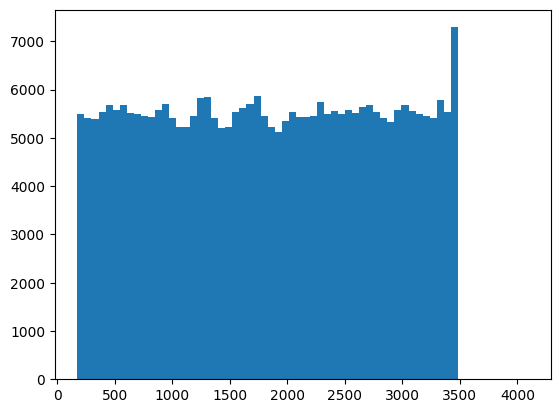

In [32]:
max_12bit = (1 << 12) - 1  # 4095
microtimes = np.bitwise_and(np.right_shift(photons, 16), max_12bit)

# Reverse the microtimes by subtracting from the max value, because the raw
# microtime is measured from photon to SYNC, not SYNC to photon.
microtimes = max_12bit - microtimes

h = plt.hist(microtimes, bins=64)

In [61]:
np.concatenate(data).view(np.uint32)

array([3221225473, 2411135123,  205127941, ..., 3221225473, 2151154054,
       2153186587], dtype=uint32)

In [60]:
np.array(data_r).view(np.uint32)

array([3221225473, 2411135123,  205127941, ..., 2154760706, 2154695274,
       2154629892], dtype=uint32)

In [63]:
len(data_r), len(data)

(5760, 932)

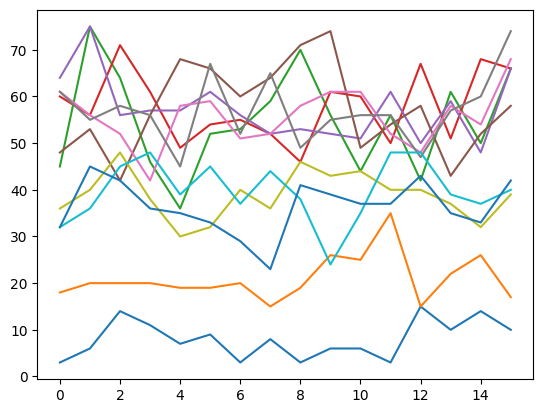

In [78]:
max_12bit = 4095
for ix,data_r in enumerate(data):
    records_r = np.array(data_r).view(np.uint32)
    had_gap = np.any(np.bitwise_and(records_r, 1 << 29))
    if had_gap:
        print("had gap")
    photons_r = np.extract(np.bitwise_and(records_r, 0b1001 << 28) == 0, records_r)
    
    microtimes = np.bitwise_and(np.right_shift(photons_r, 16), max_12bit)
    microtimes = max_12bit - microtimes
    n,h = np.histogram(microtimes, bins=16);
    plt.plot(n)
    #break
    if ix==10:
        break
    

In [68]:
n

array([5450, 5466, 5369, 5487, 5770, 5559, 5602, 5563, 5590, 5420, 5453,
       5656, 5692, 5395, 5295, 5357, 5578, 5922, 5674, 5591, 5164, 5411,
       5533, 5821, 5750, 5749, 5499, 5383, 5248, 5442, 5498, 5615, 5558,
       5520, 5584, 5431, 5559, 5559, 5630, 5641, 5714, 5622, 5529, 5379,
       5524, 5505, 5718, 5558, 5592, 5410, 5526, 5633, 5538, 7306,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    1], dtype=int64)